# Exploratory Analysis

## Eploring SpotiPy
- Explore available data
- Select features of interest
- Generate initial dataframe and database

###### Note:
###### - Potentially building a recomender system that can take a set of the most frequently played songs from one user, and match them with a second users profile; potentially between courting couples and friends
###### - Consider doing podcasts as a feature for the people that might be interested in that
###### - Also, consider calling the playlists `"{user_1} and {user_2}'s Playlist Baby"`

In [3]:
# imports

import sys
import json
import spotipy
import psycopg2
import webbrowser
import numpy as np
import pandas as pd
from os import getenv
import spotipy.util as util
from dotenv import load_dotenv
from json.decoder import JSONDecodeError
from spotipy.oauth2 import SpotifyClientCredentials, SpotifyOAuth

notes: pivoting given that we cannot create two playlists for two users simultaneously
- we can create a single play list for one user given the other user's library
- so what we'll do it take the two user libraries and generate a playlist for a single user
- given the music from a second play list

In [ ]:
# We are using the client Module from the Python library for the Spotify API
# (https://spotipy.readthedocs.io/en/2.13.0/#module-spotipy.client)
# Client Credentials Flow


load_dotenv()  # this imports all .env variables

# Setting up env variables to connect to API
uri = getenv('uri') # must match in the Spotify app dashboard
SPOTIFY_CLIENT_ID = getenv('SPOTIFY_CLIENT_ID')
SPOTIFY_CLIENT_SECRET = getenv('SPOTIFY_CLIENT_SECRET')
username = getenv('USER_ID')  #  user who's data we are collecting
cache_path = ('../.user_cache')
scope = 'playlist-modify-public user-library-read user-top-read'

# Access token to obtain user info
token = util.prompt_for_user_token(username='Agustinvargas',
                                   client_id=SPOTIFY_CLIENT_ID,
                                   client_secret=SPOTIFY_CLIENT_SECRET,
                                   scope=scope,
                                   redirect_uri=uri)

# activating spotify session
spotify_session = spotipy.Spotify(auth=token)

Couldn't read cache at: .cache-Agustinvargas


In [5]:
user = spotify_session.current_user()
user['id'], user['display_name']

('avargas-274', 'avargas-274')

In [6]:
# user this when you already have the user
spot_cc = spotipy.oauth2.SpotifyOAuth(
                                    username='',
                                    client_id=SPOTIFY_CLIENT_ID,
                                    client_secret=SPOTIFY_CLIENT_SECRET,
                                    cache_path=cache_path,
                                    scope=scope,
                                    redirect_uri=uri
                                    )
spot = spotipy.Spotify(auth_manager=spot_cc)

In [22]:
user_info = spot.current_user()
ref_3 = spot_cc.refresh_access_token(ref_2['refresh_token'])
ref['access_token'] == ref_2['access_token'] == ref_3['access_token']

False

In [55]:
user_info['display_name'], user_info['id']

('avargas-274', 'avargas-274')

In [80]:
import random

playlists = spotify_session.user_playlists('37t3cvb5u3o97hin4bsj40abw')
playlists

playlist_ids = []
for playlist_item in playlists['items']:
    playlist_ids.append(playlist_item['id'])

print(playlist_ids)
    
all_track_ids = []
for playlist_id in playlist_ids:
    playlist_trx = spotify_session.playlist_tracks(
                                            playlist_id,
                                            offset=1,
                                            fields='items.track.id'
                                            )
    for trx in playlist_trx['items']:
        all_track_ids.append(trx['track']['id'])

# print(all_track_ids)
top_50_aud_feat = spotify_session.audio_features(tracks=random.sample(all_track_ids, 50))

['2Pk3OLPiVXIZHieWs5ZGHp', '5xT24CFEoMM2udviqtc3Pb', '3CzEMPwUNr3Ci2U1C8nvM6', '3BwjT1CuslwpMqNnPK4mYe', '2sSerqYIlV8MbGdACTnFTG', '2J33VEAP3HnxACz0ntmKau']
[{'danceability': 0.646, 'energy': 0.307, 'key': 6, 'loudness': -11.669, 'mode': 1, 'speechiness': 0.0333, 'acousticness': 0.822, 'instrumentalness': 0.00305, 'liveness': 0.0971, 'valence': 0.25, 'tempo': 155.918, 'type': 'audio_features', 'id': '1s3WD4gbNoEXHiuSTmAKaK', 'uri': 'spotify:track:1s3WD4gbNoEXHiuSTmAKaK', 'track_href': 'https://api.spotify.com/v1/tracks/1s3WD4gbNoEXHiuSTmAKaK', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1s3WD4gbNoEXHiuSTmAKaK', 'duration_ms': 224046, 'time_signature': 3}, {'danceability': 0.478, 'energy': 0.738, 'key': 10, 'loudness': -7.867, 'mode': 1, 'speechiness': 0.0423, 'acousticness': 0.0263, 'instrumentalness': 0, 'liveness': 0.0977, 'valence': 0.871, 'tempo': 180.159, 'type': 'audio_features', 'id': '77hQkIXbWaAe8LbE61txGM', 'uri': 'spotify:track:77hQkIXbWaAe8LbE61txGM', 'track_

In [48]:
len(playlists['items'])

6


## Goals 
- Connect to user library using [scopes](https://developer.spotify.com/documentation/general/guides/scopes/)
- Scopes to connect to are [user-library-read](https://developer.spotify.com/documentation/general/guides/scopes/#user-library-read), [playlist-modify-public](https://developer.spotify.com/documentation/general/guides/scopes/#playlist-modify-public), and [user-top-read](https://developer.spotify.com/documentation/general/guides/scopes/#user-top-read)

##### **The goal here is to cnnect to the users' respective libraries, analyze them, and create a new playlist.**
- For this analysis I will exlpore the Audio Features Objects

# Exploring Top Tracks for a user

In [22]:
# Playing with the api: accessing user top read, modify playlist, read library

# User top artists (test)
top_artists = spotify_session.current_user_top_artists(limit=1)

# User top tracks (test)
top_tracks = spotify_session.current_user_top_tracks(limit=50, time_range='medium_term')

# Exploring Track_ids (test)
print(top_tracks['items'][0]['id'] == "0akyEssGRVHstqCSWXusJL")
top_track_id = top_tracks['items'][0]['id']

# Top ten tracks ids
top_50_tracks_id = [top_tracks['items'][x]['id'] for x in range(len(top_tracks['items']))]
print(top_50_tracks_id)

# Top track Audio Features Object
audio_feat = spotify_session.audio_features(tracks=top_50_tracks_id)

True
['0akyEssGRVHstqCSWXusJL', '02gaYAEdeR6poHcBH1KUQF', '0NeJjNlprGfZpeX2LQuN6c', '6plO0gM4tUvRC9TKFGIuaN', '54KsfVVnN4YWI2mMrnyUcC', '1jecO8NeYLsVWVptITz4c1', '5iSpfk6cDOSYePagAoG639', '6KseaEAFSS63N2NPZtDnRL', '1s3WD4gbNoEXHiuSTmAKaK', '4zFPUEMucYleIIUnYVoeZf', '57mLRN6tfXwTRvp9oPWpop', '7kWFRZdedr2gtfE8JDumVZ', '52N0IV8hLVkRmnpFclmCzK', '1IF5UcqRO42D12vYwceOY6', '2UxrK7r4cyQOSh7wvdQTe1', '17OkYffr0SdAcpcbwMkDDG', '0107Auhv91hE49iLoxtayt', '4cJOLN346rtOty3UPACsao', '6Zy0ITa16EjCAbbGuPzdRi', '71Mj2THXRicZhTFGzln3al', '0JfsIu62NVXNQl2s7ATN37', '1sJev5Y7VI2Ke8AwUpnh0l', '3PUbNbybe6dTMWdUt9vQ02', '4RrOSjdnV8rkpIuOIfkKYS', '7v3YlquaNhK2GYKzxovSEp', '4RNYL9drYkmWYpDyfknta9', '51wUFdgpNsV8cVzu7i6N0l', '1yTJg3lyUPmwbnve82twH5', '6fcS6fncRVP8rldHjriZHS', '0xSqHQ5wv80hNkpU50vPc7', '2TzkIzgzIHhewMxyh1u4hh', '1VA0QtG2DXGF4k6fYz70PE', '3PVgZvHQdNJHR0ZLN1u8vn', '4utNmwmHfwvzPBT3kMtwEN', '5ONAA8z6SvFBniu8zXz1Ax', '58iNllszkXpDOcYRgcfLfH', '3QIQtCPni57ZcSPzz7JDxt', '2nU1HJ8GcMPkatnvI6KjP4', '7ukRl

In [23]:
# Obtainiing track-name and artist name

top_tracks.keys()
top_tracks['items'][0].keys()
top_tracks['items'][0]['name']                # Generates track name
top_tracks['items'][0]['artists'][0]['name']  # Generates artist name

'Ed Maverick'

In [24]:
# We can obtain specific features for each track, this way we will upload 
# track features for each track using the function below
print(audio_feat[0]['danceability'],
audio_feat[0]['energy'],
audio_feat[0]['key'],
audio_feat[0]['loudness'],
audio_feat[0]['mode'],
audio_feat[0]['speechiness'],
audio_feat[0]['acousticness'],
audio_feat[0]['instrumentalness'],
audio_feat[0]['valence'],
audio_feat[0]['liveness'],
audio_feat[0]['tempo'],
audio_feat[0]['duration_ms'],
audio_feat[0]['time_signature'])

0.83 0.159 1 -14.461 1 0.0383 0.946 2.02e-05 0.189 0.362 104.95 207400 4


# Creating a DF from user's top tracks:
- Tracks Audio Features (top_tracks_df)


In [25]:
top_tracks_df = pd.DataFrame(audio_feat)
top_tracks_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.830,0.159,1,-14.461,1,0.0383,0.946,0.000020,0.3620,0.189,104.950,audio_features,0akyEssGRVHstqCSWXusJL,spotify:track:0akyEssGRVHstqCSWXusJL,https://api.spotify.com/v1/tracks/0akyEssGRVHs...,https://api.spotify.com/v1/audio-analysis/0aky...,207400,4
1,0.726,0.125,5,-9.194,0,0.0803,0.835,0.000000,0.1310,0.277,92.230,audio_features,02gaYAEdeR6poHcBH1KUQF,spotify:track:02gaYAEdeR6poHcBH1KUQF,https://api.spotify.com/v1/tracks/02gaYAEdeR6p...,https://api.spotify.com/v1/audio-analysis/02ga...,183711,4
2,0.658,0.179,8,-10.866,1,0.0448,0.689,0.000000,0.1700,0.191,128.128,audio_features,0NeJjNlprGfZpeX2LQuN6c,spotify:track:0NeJjNlprGfZpeX2LQuN6c,https://api.spotify.com/v1/tracks/0NeJjNlprGfZ...,https://api.spotify.com/v1/audio-analysis/0NeJ...,238560,4
3,0.780,0.230,4,-12.706,1,0.0448,0.913,0.002790,0.0798,0.125,123.937,audio_features,6plO0gM4tUvRC9TKFGIuaN,spotify:track:6plO0gM4tUvRC9TKFGIuaN,https://api.spotify.com/v1/tracks/6plO0gM4tUvR...,https://api.spotify.com/v1/audio-analysis/6plO...,240307,4
4,0.770,0.325,7,-11.301,1,0.0322,0.899,0.000556,0.2200,0.721,103.085,audio_features,54KsfVVnN4YWI2mMrnyUcC,spotify:track:54KsfVVnN4YWI2mMrnyUcC,https://api.spotify.com/v1/tracks/54KsfVVnN4YW...,https://api.spotify.com/v1/audio-analysis/54Ks...,209652,4


In [26]:
# Combining 'track/artist name' and 'top_tracks_df' DataFrames and droping useless columns

# Dopping columns from 'top_tracks_df'
drop_col = ['type', 'track_href', 'analysis_url', 'uri']
top_tracks_df = top_tracks_df.drop(drop_col, axis=1)
top_tracks_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,0.830,0.159,1,-14.461,1,0.0383,0.946,0.000020,0.3620,0.189,104.950,0akyEssGRVHstqCSWXusJL,207400,4
1,0.726,0.125,5,-9.194,0,0.0803,0.835,0.000000,0.1310,0.277,92.230,02gaYAEdeR6poHcBH1KUQF,183711,4
2,0.658,0.179,8,-10.866,1,0.0448,0.689,0.000000,0.1700,0.191,128.128,0NeJjNlprGfZpeX2LQuN6c,238560,4
3,0.780,0.230,4,-12.706,1,0.0448,0.913,0.002790,0.0798,0.125,123.937,6plO0gM4tUvRC9TKFGIuaN,240307,4
4,0.770,0.325,7,-11.301,1,0.0322,0.899,0.000556,0.2200,0.721,103.085,54KsfVVnN4YWI2mMrnyUcC,209652,4


In [27]:
top_tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      50 non-null     float64
 1   energy            50 non-null     float64
 2   key               50 non-null     int64  
 3   loudness          50 non-null     float64
 4   mode              50 non-null     int64  
 5   speechiness       50 non-null     float64
 6   acousticness      50 non-null     float64
 7   instrumentalness  50 non-null     float64
 8   liveness          50 non-null     float64
 9   valence           50 non-null     float64
 10  tempo             50 non-null     float64
 11  id                50 non-null     object 
 12  duration_ms       50 non-null     int64  
 13  time_signature    50 non-null     int64  
dtypes: float64(9), int64(4), object(1)
memory usage: 5.6+ KB


# Gathering library of songs from a given user: first user here is `spotify`

In [28]:
# Getting all playlists for the user Spotify

print('''This cell gathers the playlists of a single user; will be used when getting new users''')

# playlists = spotify_session.user_playlists('spotify')
# playlist_ids = []
# while playlists:
#     for i, playlist in enumerate(playlists['items']):
#         playlist_ids.append(playlist['id'])
#     if playlists['next']:
#         playlists = spotify_session.next(playlists)
#     else:
#         playlists = None

This cell gathers the playlists of a single user; will be used when getting new users


In [29]:
# `.playlist_tracks()` method allows one to obtain all tracks in a playlist

print('''this is the method used to gather the tracks in a playlist''')

# response = spotify_session.playlist_tracks(playlist_ids[0],
#                                            offset=1,
#                                            fields='items.track.id')

this is the method used to gather the tracks in a playlist


In [30]:
# Obtaining track IDs for tracks in a playlist

print('''Note: this cell takes time to complete running; so run cautiously; only run this cell when gathering user songs''')


# trx = []
# for i in playlist_ids:
#     offset = 0
#     while True:
#         response = spotify_session.playlist_tracks(i,
#                                                    offset=offset,
#                                                    fields='items.track.id')
# #         trx.append(response['items'])
#         offset = offset + len(response['items'])
#         if len(response['items']) == 0:
#             break
#         trx.append(response['items'])

Note: this cell takes time to complete running; so run cautiously; only run this cell when gathering user songs


In [31]:
# Dropping empty lists

print('''Drops empty list''')

# for k, v in enumerate(trx):
#     if len(trx[k]) == 0:
# #         print(trx[k])
#         trx.pop(k)

Drops empty list


In [32]:
# Creating a list of track-id strings

print('''generates list of track IDs for given user playlists''')

# track_ids = []

# for lst in trx:
# #     print(lst)
#     for tracks in lst:
#         if tracks['track'] == None:
#             continue
#         track_ids.append(tracks['track']['id'])
#         print(tracks['track']['id'])

generates list of track IDs for given user playlists


In [33]:
# Removing None type track ids

print('''removes Nonetype track IDs''')

# for k, track in enumerate(track_ids):
#     if track == None:
#         track_ids.pop(k)
# len(track_ids)

removes Nonetype track IDs


In [34]:
# Configureing authentication to obtain token refresh details

# OAuth Creds
spot_cc = spotipy.oauth2.SpotifyOAuth(username='Agustinvargas',
                                      client_id=SPOTIFY_CLIENT_ID,
                                      client_secret=SPOTIFY_CLIENT_SECRET,
                                      redirect_uri=uri)

# Token Access Dict
accs_token = spot_cc.get_access_token(as_dict=True)

# Token Expiration boolian
token_exp = spot_cc.is_token_expired(accs_token)

# Refreshing token
refresh_accs_token = spot_cc.refresh_access_token(accs_token['refresh_token'])

/Users/flanuer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  # Remove the CWD from sys.path while we load stuff.


# Following sets of cells generate a large dataset from which to work with.  The dataset will continue to grow as the number of users grows

In [44]:
_id = str(top_tracks_df['id'][1])
_id

'02gaYAEdeR6poHcBH1KUQF'

In [46]:
recs = spotify_session.recommendations(seed_tracks=[_id])
recs

{'tracks': [{'album': {'album_type': 'ALBUM',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7i1CyQ1fogh4bkj3EPj3ls'},
      'href': 'https://api.spotify.com/v1/artists/7i1CyQ1fogh4bkj3EPj3ls',
      'id': '7i1CyQ1fogh4bkj3EPj3ls',
      'name': 'Girl Ultra',
      'type': 'artist',
      'uri': 'spotify:artist:7i1CyQ1fogh4bkj3EPj3ls'}],
    'available_markets': ['AD',
     'AE',
     'AL',
     'AR',
     'AT',
     'AU',
     'BA',
     'BE',
     'BG',
     'BH',
     'BO',
     'BR',
     'BY',
     'CA',
     'CH',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DE',
     'DK',
     'DO',
     'DZ',
     'EC',
     'EE',
     'EG',
     'ES',
     'FI',
     'FR',
     'GB',
     'GR',
     'GT',
     'HK',
     'HN',
     'HR',
     'HU',
     'ID',
     'IE',
     'IL',
     'IN',
     'IS',
     'IT',
     'JO',
     'JP',
     'KW',
     'KZ',
     'LB',
     'LI',
     'LT',
     'LU',
     'LV',
     'MA',
     'MC',
     'MD',
  

In [20]:
print('''Do not run this cell unless you are looking to update data of +100k song audiofeatures''')


# # Obtaining Audio Features for +100k songs

# # Client Authentication
# spotify_session = spotipy.client.Spotify(auth=accs_token['access_token'])

# # Access Token
# accs_token = spot_cc.get_access_token(as_dict=True)

# # Token Expiration Boolian
# token_exp = spot_cc.is_token_expired(accs_token)

# # The following loops over the TrackIDs (track_ids) list to obtain
# # audio features for each track

# lst_v_lst= []  # list to be populated with lists of audio features of a track
# for j in track_ids:
#     token_exp = spot_cc.is_token_expired(accs_token)           # Checks for token expiration
#     if token_exp == False:                                     # if token not expired, continue loop
#         audio_feat = spotify_session.audio_features(tracks=j)  # obtain aud_feats for song from SpotifyAPI
#         if audio_feat[0] is None:                              # if aud_feat don't exit for song skip
#             continue
#         else:
#             v_lst = []
#             for _, v in audio_feat[0].items():  # for loop through the 0th item to append values
#                 v_lst.append(v)                 # aud_feats for song appended to a list
#             lst_v_lst.append(v_lst)             # list of aud_feats appends to list of lists
#     else:
#         accs_token = spot_cc.refresh_access_token(accs_token['refresh_token'])    # If token expired, refresh token
#         token_exp = spot_cc.is_token_expired(accs_token)                          # Not really necessary
#         spotify_session = spotipy.client.Spotify(auth=accs_token['access_token']) # Set session to refreshed token

Do not run this cell unless you are looking to update data of +100k song audiofeatures


In [21]:
print('''This cell corresponds to previous cell as well, do not run uncommented''')

# # Collecting song IDs from generated aud_feat lists
# # so that we can gather accurate song title/artists
# # data frame to match

# # list to be populated with song IDs
# track_ids_aud_feat = []

# for k, v in enumerate(lst_v_lst):
#     track_ids_aud_feat.append(lst_v_lst[k][12])  # 12th index position contains ID strings
# len(track_ids_aud_feat). # 104k IDs gathered

This cell corresponds to previous cell as well, do not run uncommented


In [22]:


print('''This cell corresponds to previus cells, do not run uncommented''')


# # Generating lists containing Artist names and Track names

# # Refreshing token
# accs_token = spot_cc.refresh_access_token(accs_token['refresh_token'])
# spotify_session = spotipy.client.Spotify(auth=accs_token['access_token'])

# # Getting artist name and track name (test)
# track = spotify_session.track(track_ids_aud_feat[0])
# print(track['artists'][0]['name'])    # Generates artist name
# print(track['name'])                  # Generates track name      

# # Lists to be populated
# track_names_lst = []
# artist_names_lst = []

# # Iterating over list of track IDs (track_ids_aud_feat)
# for j in track_ids_aud_feat:
#     token_exp = spot_cc.is_token_expired(accs_token)
#     if token_exp == False:
#         track = spotify_session.track(j)
#         track_names_lst.append(track['name'])
#         artist_names_lst.append(track['artists'][0]['name'])
#     else:
#         accs_token = spot_cc.refresh_access_token(accs_token['refresh_token'])
#         token_exp = spot_cc.is_token_expired(accs_token)
#         spotify_session = spotipy.client.Spotify(auth=accs_token['access_token'])

This cell corresponds to previus cells, do not run uncommented


In [53]:
print("""Here we can simply import the CSV file created from all of the gathered song's aud_feats, titles, and artist names""")



# # DataFrame containing artists names and track names
# full_track_artist_names = pd.DataFrame(list(zip(track_names_lst, artist_names_lst)), columns=['track name', 'artist'])
# full_track_artist_names.head(3)

Here we can simply import the CSV file created from all of the gathered song's aud_feats, titles, and artist names


In [23]:
print('''This was the resulting dataframe from the gathered song data''')

# DataFrame from the obtained audio features
# full_df = pd.DataFrame(lst_v_lst, columns=k_lst)

This was the resulting dataframe from the gathered song data


# Importing newly generated song data from corresponding CSV files
- full_track_artist_names: composed of track names corresponding to Audio Features generated amanually (see previous commented out cells)
- full_df: contains all Audio Features for over 100k songs
- songs_100_df: contains dataset found online that contains same parameters

In [4]:
# Importing CSV files of +200k songs

full_df = pd.read_csv('/Users/flanuer/Downloads/Lambda/Course_material/misc_datasets/100k_song_aud_feat.csv')#, index_col='id')
drop_col = ['uri', 'Unnamed: 0']
full_df = full_df.drop(drop_col, axis=1)
full_df.head()

drop_cols = ['track name', 'artist', 'uri', 'Unnamed: 0']
songs_100_df = pd.read_csv('/Users/flanuer/Downloads/Lambda/Course_material/misc_datasets/songs100k.csv')#, index_col='id')
songs_100_df = songs_100_df.drop(drop_cols, axis=1)
songs_100_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,0.743,0.339,1,-7.678,1,0.4090,0.005820,0.000,0.0812,0.118,203.927,2RM4jf1Xa9zPgMGRDiht8O,238373,4
1,0.846,0.557,8,-7.259,1,0.4570,0.024400,0.000,0.2860,0.371,159.009,1tHDG53xJNGsItRA3vfVgs,214800,4
2,0.603,0.723,9,-5.890,0,0.0454,0.025000,0.000,0.0824,0.382,114.966,6Wosx2euFPMT14UXiWudMy,138913,4
3,0.800,0.579,5,-12.118,0,0.0701,0.029400,0.912,0.0994,0.641,123.003,3J2Jpw61sO7l6Hc7qdYV91,125381,4
4,0.783,0.792,7,-10.277,1,0.0661,0.000035,0.878,0.0332,0.928,120.047,2jbYvQCyPgX3CdmAzeVeuS,124016,4


In [5]:
# Joining full_df and songs_100_df

df = pd.concat([full_df, songs_100_df])
df = df.drop_duplicates(inplace=False, subset='id')
df = df.set_index('id')
df.shape

(210124, 13)

In [156]:
print('''No need to do anything here.''')
# Exporting dataframe of +100k songs to csv file
# full_df.to_csv(r'/Users/flanuer/Downloads/Lambda/Course_material/misc_datasets/100k_song_aud_feat.csv')
# full_track_artist_names.to_csv(r'/Users/flanuer/Downloads/Lambda/Course_material/misc_datasets/100k_song_names.csv')

No need to do anything here.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210124 entries, 0v1x6rN6JHRapa03JElljE to 7LNtyuekYHiZ99UxkrfCQR
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   danceability      210124 non-null  float64
 1   energy            210124 non-null  float64
 2   key               210124 non-null  int64  
 3   loudness          210124 non-null  float64
 4   mode              210124 non-null  int64  
 5   speechiness       210124 non-null  float64
 6   acousticness      210124 non-null  float64
 7   instrumentalness  210124 non-null  float64
 8   liveness          210124 non-null  float64
 9   valence           210124 non-null  float64
 10  tempo             210124 non-null  float64
 11  duration_ms       210124 non-null  int64  
 12  time_signature    210124 non-null  int64  
dtypes: float64(9), int64(4)
memory usage: 22.4+ MB


In [9]:
# df.dropna(inplace=True)
df.isna().any()

danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
duration_ms         False
time_signature      False
dtype: bool

In [10]:
# Need to drop speechiness

top_tracks_df = top_tracks_df.set_index('id')
top_tracks_df.head()
top_tracks_df.isna().any()

NameError: name 'top_tracks_df' is not defined

# Baseline Explorations (ML)
- Select type of problem type (class/reg)
- Determine model baselines
- Model evaluations/comparisons

#### Note: Modeel takes in Audio Features of one user, and attempts to predict the songs of the other user; the resulting song IDs are used to generate a playlist

In [1]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, LabelEncoder

In [11]:
# Setting up train, test, and val sets

target = df.index
features = ['danceability',
            'energy',
            'key',
            'loudness',
            'mode',
            'speechiness',
            'acousticness',
            'instrumentalness',
            'liveness',
            'valence',
            'tempo',
            'duration_ms',
            'time_signature']

# Splitting DF into target and features 
y = target
X = df[features]

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=.5, random_state=42)

# # Splitting the DFs
# y_top = top_tracks_df.index
# X_top = top_tracks_df[features]

# # User library
# X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y_top, test_size=0.8)

In [12]:
# Check
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((126074, 13), (42025, 13), (42025, 13), (126074,), (42025,), (42025,))

In [13]:
scaled_data = StandardScaler().fit_transform(df)
scaled_data.shape

(210124, 13)

In [14]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

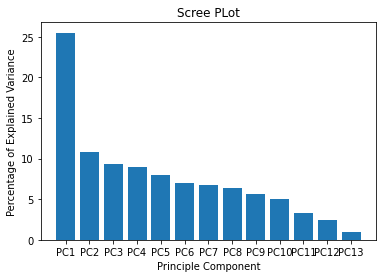

In [15]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principle Component')
plt.title('Scree PLot')
plt.show()

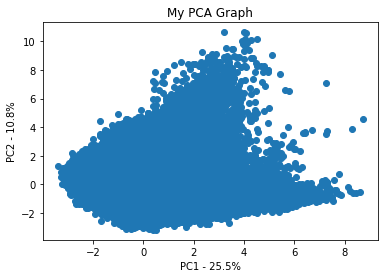

In [16]:
pca_df = pd.DataFrame(pca_data, index=df.index, columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

# for sample in pca_df.index:
#     plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()

In [17]:
loading_scores = pd.Series(pca.components_[0], index=features)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top = sorted_loading_scores[:].index.values
print(loading_scores[top])

loudness           -0.479078
energy             -0.466210
acousticness        0.429099
danceability       -0.323265
valence            -0.308747
instrumentalness    0.288249
tempo              -0.195303
time_signature     -0.181382
duration_ms         0.091182
liveness           -0.062050
mode                0.046217
key                -0.026821
speechiness         0.005603
dtype: float64


In [18]:
pipeline_nn = make_pipeline(SimpleImputer(),
                            StandardScaler(),
                            NearestNeighbors()
                           )

In [19]:
nbrs = NearestNeighbors(n_neighbors=10).fit(X_train)

In [21]:
distances, indeces = nbrs.kneighbors(X_test)

In [23]:
tracks = []
for i in indeces:
#     print(i[0])
    tracks.append(df.index[i[0]])
#     tracks.append(df['id'][i[1]])

42025